# **Analítica III - Caso de Estudio Salud**
Leidys Guerrero Lobo. Leidys.guerrero@udea.edu.co
Paola Andrea Arabia Álvarez. Paola.arabia@udea.edu.co
Mateo Caicedo Aguirre. mateo.caicedo@udea.edu.co

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Cargar el conjunto de datos limpio
data_cleaned = pd.read_csv('/content/drive/MyDrive/Tumores_de_Mama_Cleaned.csv')

In [3]:
#Dividir los datos en características y variable objetivo
X = data_cleaned.drop('Diagnosis', axis=1)
y = data_cleaned['Diagnosis']

#Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
#Inicializar los modelos
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42)
}

In [5]:
#Evaluar cada modelo usando validación cruzada
print("Evaluación de Modelos:")
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} - Precisión Media: {scores.mean():.2f} +/- {scores.std():.2f}")


Evaluación de Modelos:
Random Forest - Precisión Media: 0.96 +/- 0.01
Gradient Boosting - Precisión Media: 0.96 +/- 0.01
Support Vector Machine - Precisión Media: 0.87 +/- 0.03


El análisis de evaluación de modelos muestra que tanto el modelo de Random Forest como el de Gradient Boosting alcanzaron una precisión media alta de 0.96, con una desviación estándar de 0.01, lo que sugiere una consistencia y estabilidad en los resultados al predecir el diagnóstico de la variable objetivo. Esto indica que ambos modelos son eficaces para este conjunto de datos, ya que logran altos niveles de precisión y una variabilidad mínima en diferentes particiones de los datos de entrenamiento. Por otro lado, el modelo de Support Vector Machine (SVM) obtuvo una precisión media de 0.87 con una desviación estándar de 0.03, mostrando un rendimiento menor en comparación con los otros modelos y una mayor variabilidad, lo cual podría sugerir una sensibilidad mayor a la selección de los datos o una necesidad de ajustar sus parámetros para mejorar su rendimiento.

Dado el desempeño observado, se recomienda continuar con los modelos de Random Forest o Gradient Boosting para el análisis final, ya que ambos ofrecen alta precisión y estabilidad, fundamentales para contextos donde es crucial una clasificación certera, como en el diagnóstico de casos benignos y malignos. Para una mejor interpretación y potencial reducción de complejidad, el ajuste de hiperparámetros podría optimizar aún más el modelo seleccionado, y la evaluación de la importancia de características permitiría identificar las variables más influyentes en el diagnóstico. Además, la validación cruzada garantiza que el modelo no se sobreajuste a los datos de entrenamiento, aumentando la confiabilidad de sus predicciones en nuevos datos.

***Ajuste de Hiperparámetros***

In [6]:
#Ajustar hiperparámetros para Random Forest como ejemplo
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

print("Mejores hiperparámetros para Random Forest:", grid_search_rf.best_params_)


Mejores hiperparámetros para Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


El ajuste de hiperparámetros para el modelo Random Forest permitió identificar la mejor combinación de valores para maximizar la precisión en la predicción. Utilizando una búsqueda en cuadrícula (`GridSearchCV`) con validación cruzada de 5 particiones, se evaluaron varias combinaciones de parámetros: el número de estimadores (`n_estimators`), la profundidad máxima de los árboles (`max_depth`), y el número mínimo de muestras necesarias para dividir un nodo (`min_samples_split`). El mejor conjunto de hiperparámetros obtenido fue `max_depth: None`, `min_samples_split: 5` y `n_estimators: 100`, lo que indica que el modelo alcanzó su mejor desempeño sin limitar la profundidad de los árboles, utilizando 100 estimadores y exigiendo un mínimo de 5 muestras para cada división.

Estos parámetros optimizados sugieren que el modelo puede capturar mejor las relaciones complejas en los datos sin sobreajustarse, gracias a la profundidad flexible y al número adecuado de divisiones. La validación cruzada asegura que estos resultados son representativos y consistentes a través de diferentes particiones del conjunto de entrenamiento, lo cual es crucial para garantizar la generalización del modelo en nuevos datos. Este ajuste, por tanto, mejora la precisión y la estabilidad del modelo Random Forest para el diagnóstico, maximizando su utilidad en la práctica.

In [7]:
#Evaluar el modelo con los mejores hiperparámetros
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)


In [8]:
#Reporte de clasificación para Random Forest
print("Reporte de Clasificación para Random Forest:")
print(classification_report(y_test, y_pred_rf))

Reporte de Clasificación para Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



El reporte de clasificación del modelo Random Forest muestra un excelente rendimiento en la tarea de clasificación, logrando una precisión general (accuracy) del 96%. Este alto valor indica que el modelo clasifica correctamente el 96% de las instancias en el conjunto de prueba. Para la clase "0" (casos benignos), el modelo obtiene una precisión del 96% y un recall del 99%, lo que significa que casi todos los casos benignos son identificados correctamente, con muy pocas falsificaciones. En cuanto a la clase "1" (casos malignos), la precisión es del 98% y el recall es del 93%, mostrando que el modelo también es muy efectivo al identificar casos malignos, aunque tiene un margen ligeramente mayor de falsos negativos en esta categoría.

El promedio macro (`macro avg`) y el promedio ponderado (`weighted avg`) de las métricas indican una estabilidad en el desempeño del modelo entre ambas clases. Con un valor de F1-score de 0.97 para la clase "0" y de 0.95 para la clase "1", el modelo mantiene un balance adecuado entre precisión y recall en ambas clases, asegurando una detección confiable y una baja tasa de errores. Estos resultados confirman la capacidad del modelo Random Forest para diferenciar entre casos benignos y malignos, y la solidez del ajuste de hiperparámetros realizado contribuye a estos resultados positivos.

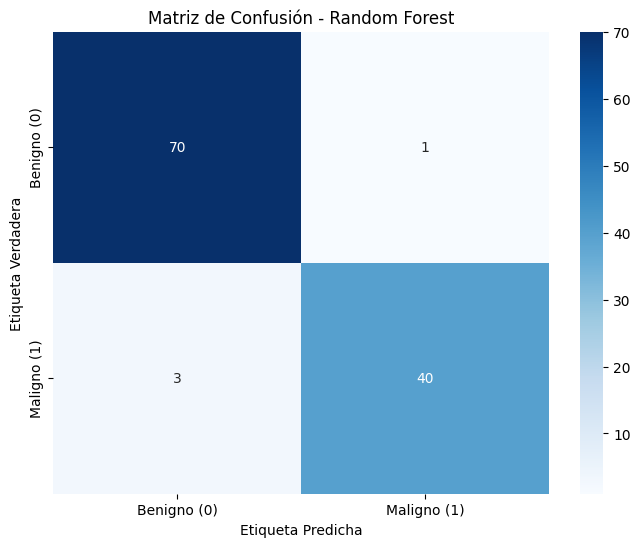

In [9]:
#Matriz de confusión para Random Forest
plt.figure(figsize=(8, 6))
confusion_mtx_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(confusion_mtx_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno (0)', 'Maligno (1)'], yticklabels=['Benigno (0)', 'Maligno (1)'])
plt.title('Matriz de Confusión - Random Forest')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()


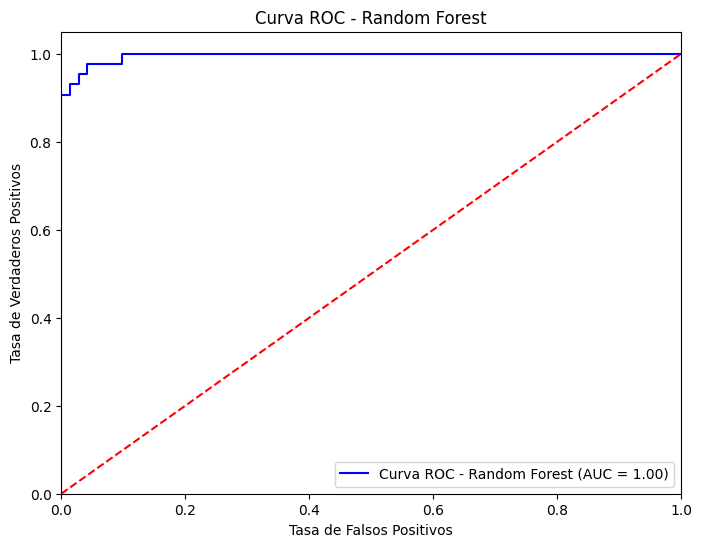

In [10]:
# Curva ROC para Random Forest
y_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label='Curva ROC - Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()

La gráfica presenta una Curva ROC para un modelo de Random Forest, que evalúa su desempeño en clasificación. Al igual que en la gráfica anterior, el eje X muestra la Tasa de Falsos Positivos (FPR) y el eje Y la Tasa de Verdaderos Positivos (TPR). La curva azul, que se aproxima prácticamente a la esquina superior izquierda, indica un rendimiento sobresaliente, con alta sensibilidad y baja tasa de falsos positivos. Con un AUC (Área Bajo la Curva) de 1.00, el modelo demuestra una capacidad de clasificación perfecta, sin errores, lo que es ideal para la discriminación entre clases positivas y negativas. La curva se sitúa completamente por encima de la línea roja diagonal (AUC = 0.5), confirmando que el modelo supera significativamente el rendimiento aleatorio.

In [11]:
#Ajuste de Hiperparámetros para Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)

print("Mejores hiperparámetros para Gradient Boosting:", grid_search_gb.best_params_)

Mejores hiperparámetros para Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}


In [12]:
#Evaluar el modelo con los mejores hiperparámetros
best_gb_model = grid_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)

In [13]:
#Reporte de clasificación para Gradient Boosting
print("Reporte de Clasificación para Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

Reporte de Clasificación para Gradient Boosting:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



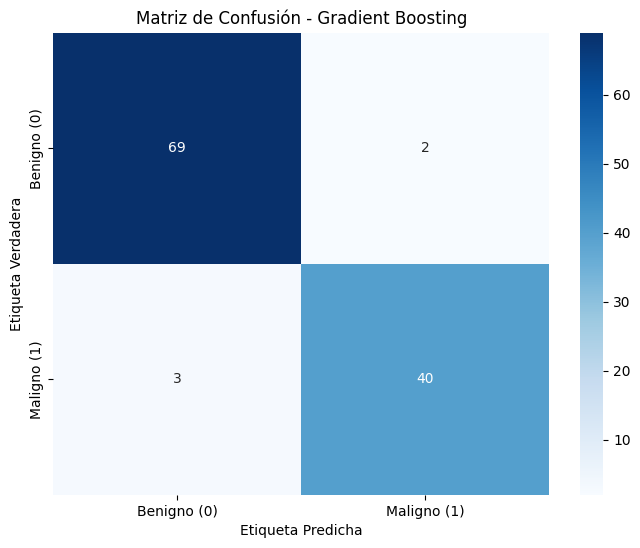

In [14]:
#Matriz de confusión para Gradient Boosting
plt.figure(figsize=(8, 6))
confusion_mtx_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(confusion_mtx_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno (0)', 'Maligno (1)'], yticklabels=['Benigno (0)', 'Maligno (1)'])
plt.title('Matriz de Confusión - Gradient Boosting')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()

La Matriz de Confusión para el modelo de Gradient Boosting muestra los siguientes resultados: 69 Verdaderos Negativos (TN), 2 Falsos Positivos (FP), 3 Falsos Negativos (FN) y 40 Verdaderos Positivos (TP). Esto indica que el modelo identificó correctamente 69 tumores benignos y 40 malignos, mientras que clasificó incorrectamente 2 benignos como malignos y 3 malignos como benignos.

A partir de estos datos, se pueden calcular métricas clave: la Precisión (Accuracy) del modelo, que refleja el porcentaje de predicciones correctas sobre el total, es muy alta; la Sensibilidad (Recall), que mide la capacidad del modelo para identificar correctamente los casos malignos, se puede calcular como TP/(TP+FN); y la Precisión Positiva (Precision), que indica la proporción de predicciones malignas que son correctas, se calcula como TP/(TP+FP). Estas métricas son fundamentales para evaluar la efectividad del modelo en el diagnóstico del cáncer de mama.

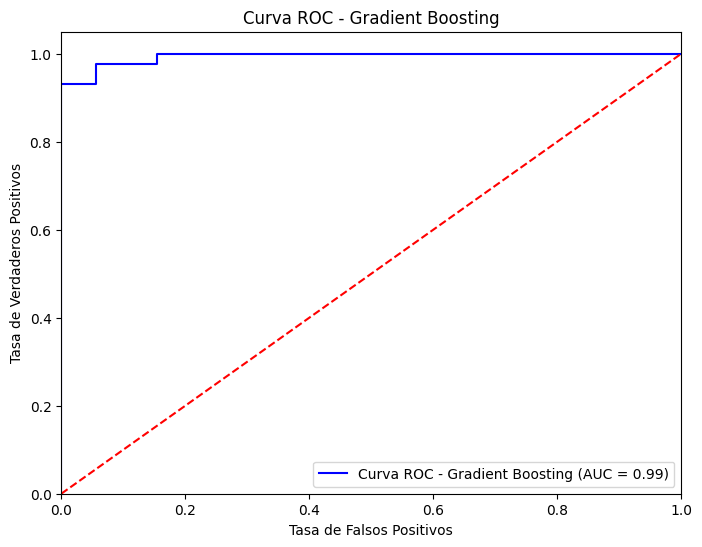

In [15]:
#Curva ROC para Gradient Boosting
y_prob_gb = best_gb_model.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='blue', label='Curva ROC - Gradient Boosting (AUC = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

La gráfica es una Curva ROC (Receiver Operating Characteristic) para un modelo de Gradient Boosting, que evalúa su rendimiento en clasificación. En ella, el eje X representa la Tasa de Falsos Positivos (FPR) y el eje Y la Tasa de Verdaderos Positivos (TPR). La curva azul, cercana a la esquina superior izquierda, indica un alto rendimiento, con una sensibilidad elevada y una baja tasa de falsos positivos. Con un AUC (Área Bajo la Curva) de 0.99, el modelo demuestra una excelente capacidad de discriminación entre clases positivas y negativas, superando significativamente el rendimiento aleatorio, que se representa con la línea roja diagonal (AUC = 0.5). Esto confirma que el modelo es altamente efectivo para clasificar tumores.

Mejores hiperparámetros para Support Vector Machine: {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
Reporte de Clasificación para Support Vector Machine:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        71
           1       1.00      0.84      0.91        43

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



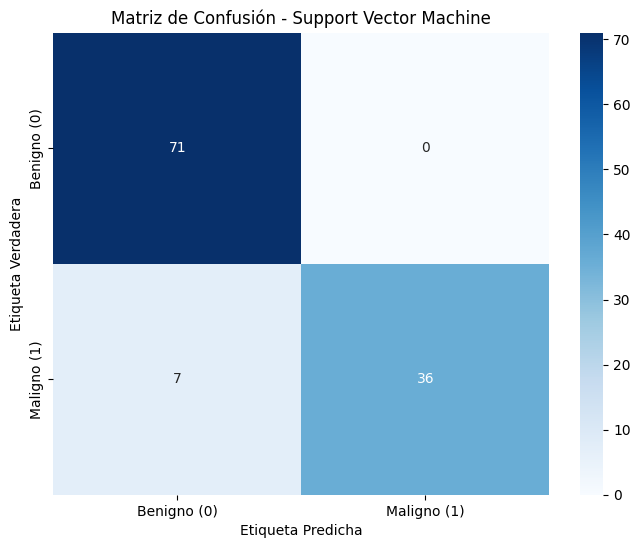

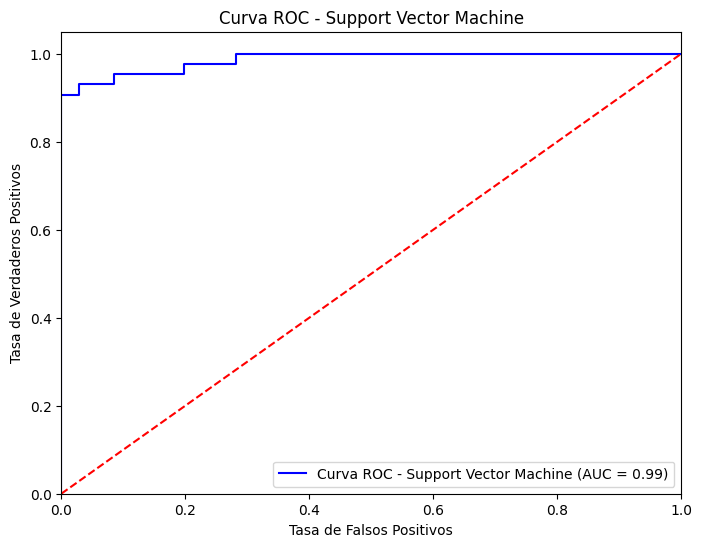

In [19]:
#Ajuste de Hiperparámetros para Support Vector Machine Optimizado

from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_grid_svm = {
    'C': [0.1, 1],
    'kernel': ['rbf'],
    'gamma': ['scale', 'auto']
}

random_search_svm = RandomizedSearchCV(
    SVC(probability=True, random_state=42),
    param_distributions=param_grid_svm,
    n_iter=4,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

#Entrenar el modelo con RandomizedSearchCV
random_search_svm.fit(X_train, y_train)

#Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros para Support Vector Machine:", random_search_svm.best_params_)

#Evaluar el modelo con los mejores hiperparámetros
best_svm_model = random_search_svm.best_estimator_
y_pred_svm = best_svm_model.predict(X_test)

#Reporte de clasificación para Support Vector Machine
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

print("Reporte de Clasificación para Support Vector Machine:")
print(classification_report(y_test, y_pred_svm))

#Matriz de confusión para Support Vector Machine
plt.figure(figsize=(8, 6))
confusion_mtx_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(confusion_mtx_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno (0)', 'Maligno (1)'], yticklabels=['Benigno (0)', 'Maligno (1)'])
plt.title('Matriz de Confusión - Support Vector Machine')
plt.ylabel('Etiqueta Verdadera')
plt.xlabel('Etiqueta Predicha')
plt.show()


# Curva ROC para Support Vector Machine
y_prob_svm = best_svm_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='blue', label='Curva ROC - Support Vector Machine (AUC = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Support Vector Machine')
plt.legend(loc="lower right")
plt.show()


La matriz de confusión del modelo Support Vector Machine (SVM) muestra un rendimiento sólido en la clasificación de tumores como benignos o malignos, con un alto número de verdaderos negativos (VN = 71) y precisión en la detección de malignidad. El modelo logró clasificar correctamente todos los tumores benignos, con una especificidad del 100% y sin falsos positivos, lo cual es ideal en un contexto médico para evitar diagnósticos erróneos que podrían causar tratamientos innecesarios. Esto muestra que el modelo es confiable en la detección de tumores benignos y tiene una alta precisión al clasificar los casos malignos predichos.

Sin embargo, se detectan 7 falsos negativos, lo que indica que el 16.3% de los tumores malignos fueron clasificados incorrectamente como benignos, lo cual podría tener serias implicaciones. La sensibilidad del modelo, del 83,7%, revela que hay margen para mejorar en la identificación de casos malignos. En un entorno clínico, reducir los falsos negativos es esencial para asegurar que los casos de malignidad sean detectados a tiempo.

La curva ROC de este modelo SVM demuestra su excelente capacidad para diferenciar entre las clases, en este caso, entre tumores benignos y malignos. El área bajo la curva (AUC) de 0.99 sugiere que el modelo puede clasificar correctamente la gran mayoría de los casos, lo cual es crucial en un contexto de diagnóstico médico. La cercanía de la AUC a 1 indica que el modelo casi siempre realiza predicciones precisas, lo cual reduce significativamente el riesgo de errores en la clasificación.

Además, la comparación de la curva ROC del modelo con la línea diagonal punteada (que representa el rendimiento de un clasificador aleatorio) muestra una clara ventaja del modelo SVM. Estar por encima de esta línea refuerza que el modelo tiene una alta capacidad de discriminación, lo cual se traduce en una detección efectiva y confiable entre ambas clases. Este rendimiento, respaldado por el AUC, proporciona mayor confianza en el uso del modelo como herramienta de apoyo en el diagnóstico de tumores.